In [1]:
from line_solver import *
GlobalConstants.set_verbose(VerboseLevel.STD)
import matplotlib.pyplot as plt

In [2]:
model = Network('Model')

# Block 1: nodes
node = np.empty(2, dtype=object)
node[0] = Delay(model, 'Delay')
node[1] = Queue(model, 'Queue1', SchedStrategy.PS)

# Block 2: classes
jobclass = np.empty(2, dtype=object)
jobclass[0] = ClosedClass(model, 'Class1', 5, node[0], 0)
node[0].set_service(jobclass[0], Exp(1.0))
node[1].set_service(jobclass[0], Exp(0.5))

# Block 3: topology
model.link(Network.serial_routing(node[0], node[1]))

In [3]:
# Block 4: solution
RDfluid = FLD(model).cdf_resp_t()
RDsim = JMT(model, seed=23000, samples=10000).cdf_resp_t()

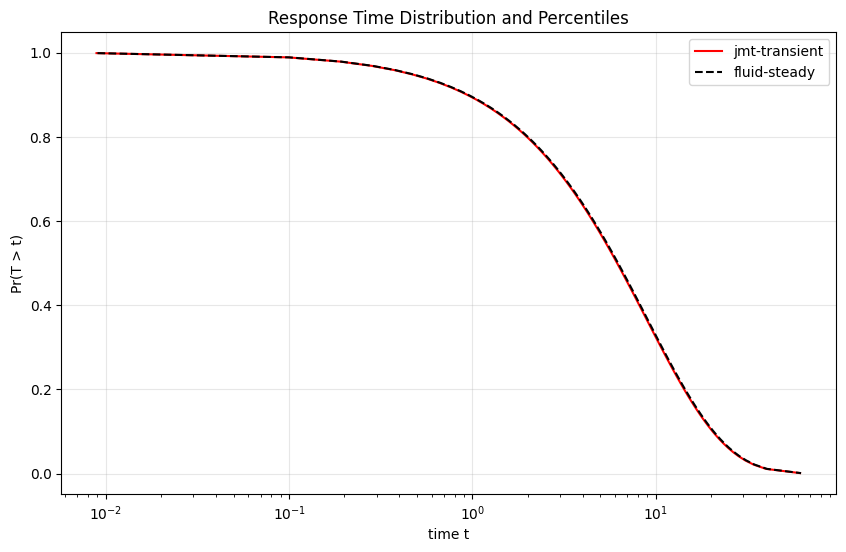

In [4]:
# Plot results
import matplotlib.pyplot as plt

if RDsim[1][0] is not None and len(RDsim[1][0]) > 0:
    plt.figure(figsize=(10, 6))
    plt.semilogx(RDsim[1][0][:, 1], 1 - RDsim[1][0][:, 0], 'r-', label='jmt-transient')
    plt.semilogx(RDfluid[1][0][:, 1], 1 - RDfluid[1][0][:, 0], 'k--', label='fluid-steady')
    plt.legend(loc='best')
    plt.ylabel('Pr(T > t)')
    plt.xlabel('time t')
    plt.title('Response Time Distribution and Percentiles')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No simulation results available for plotting")